In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

- Read data

In [16]:
data = pd.read_csv("../../data/iris.data")
data.columns = ["sepal_len", "sepal_width", "petal_len", "petal_width", "type"]

In [19]:
df = data.drop(columns=["petal_len", "petal_width"])
df

,sepal_len,sepal_width,type
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa
2,4.6,3.1,Iris-setosa
3,5.0,3.6,Iris-setosa
4,5.4,3.9,Iris-setosa
...,...,...,...
144,6.7,3.0,Iris-virginica
145,6.3,2.5,Iris-virginica
146,6.5,3.0,Iris-virginica
147,6.2,3.4,Iris-virginica


- Plot the types based on sepal length and width 

Text(0, 0.5, 'sepal_width')

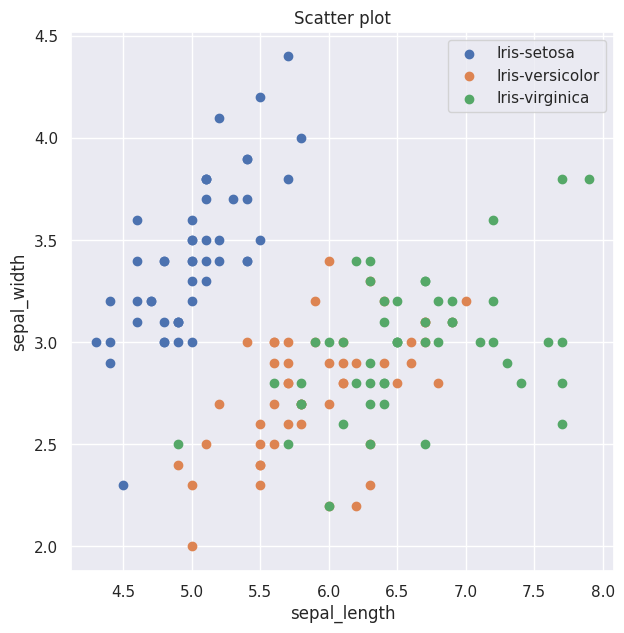

In [24]:
fig, ax = plt.subplots(figsize=(7, 7))

# Iterate through unique species in the iris dataset
for species, group in df.groupby('type'):
    ax.scatter(group['sepal_len'], group['sepal_width'], label=species)

# Add legend
ax.legend()

# Set title
plt.title('Scatter plot')

# Set axis labels
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

- predict function

In [27]:
def predict_gaussianNB_class(X, means, stds, priors):
    scores = []
    classes = len(means)

    for p in range(classes):
        score = (
            norm.pdf(x = X[0], loc = means[p][0][0], scale = stds[p][0][0])
        ) * (
            norm.pdf(x = X[1], loc = means[p][0][1], scale = stds[p][0][1])
        ) * priors[p]

        scores.append(score)

    return np.argmax(scores)

- calculate the means, standard deviations and priors

In [33]:
means = np.split(df.groupby("type").mean().values, [1, 2])
stds = np.split(df.groupby("type").std().values, [1, 2], axis = 0)
priors = df.iloc[:, 2].value_counts().values / len(df)

- do the thing...


In [43]:
n = 100
X = np.linspace(4, 8, n)
Y = np.linspace(1.5, 5, n)
X, Y = np.meshgrid(X, Y)


zz = np.array([predict_gaussianNB_class(np.array([xx, yy]).reshape(-1, 1), means, stds, priors) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

Z = zz.reshape(X.shape)


- plot!


Text(0.5, 1.0, 'Gaussian Naive Bayes decision boundaries')

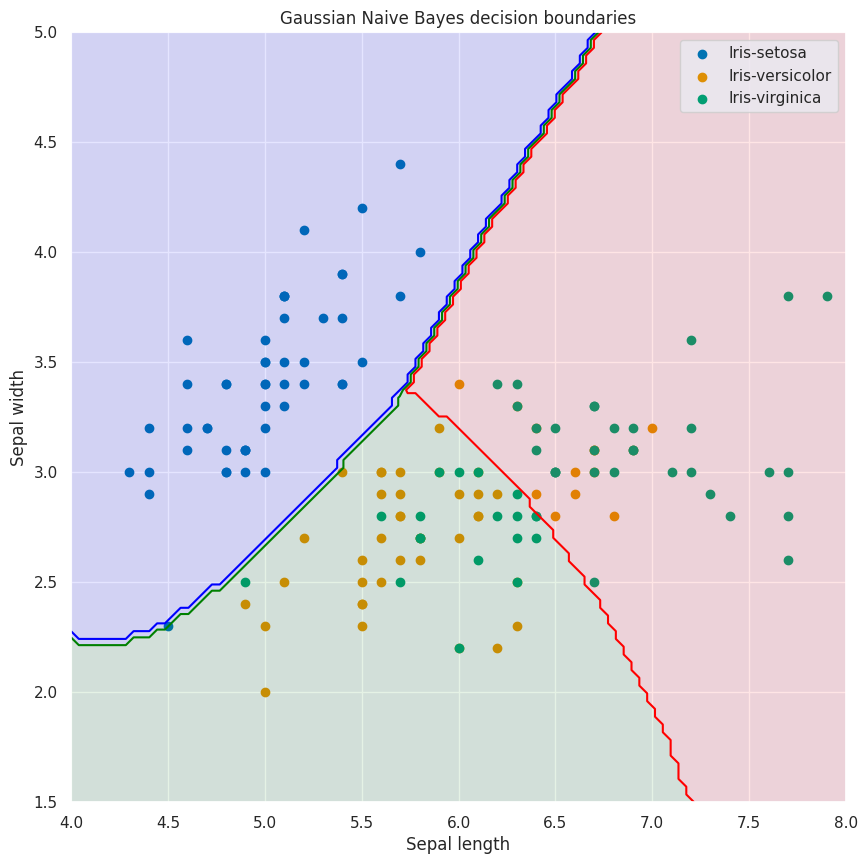

In [44]:
color_list = ["Blues", "Greens", "Reds"]
my_norm = colors.Normalize(vmin=-1, vmax=1)

fig, ax = plt.subplots(figsize=(10, 10))

# Define the palette
palette = sns.color_palette("colorblind")

# Iterate through unique species in the iris dataset
for i, (species, group) in enumerate(df.groupby('type')):
    ax.scatter(group['sepal_len'], group['sepal_width'], label=species, color=palette[i])

# Add legend
ax.legend()

# Set title
plt.title('Scatter plot')

# Set axis labels
ax.set_xlabel('1_sepal_length')
ax.set_ylabel('2_sepal_width')


#Plot the filled and boundary contours
ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Gaussian Naive Bayes decision boundaries')